# Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama

## İş Problemi

1. Gezinomi, gerçekleştirdiği satışların belirli özelliklerini kullanarak seviye tabanlı (level-based) yeni satış tanımları oluşturmak istemektedir.  
2. Bu yeni satış tanımlarına göre müşteri segmentleri belirlenerek,  
3. Her segmentin şirkete ortalama ne kadar gelir sağlayabileceği tahmin edilecektir.  

**Örnek:** Antalya’dan, yoğun sezonda, Herşey Dahil konseptli bir otele gitmek isteyen bir müşterinin şirkete ortalama getirisi hesaplanmak istenmektedir.


### Veri Girişi ve Genel İstatistikler

In [25]:
import pandas as pd

pd.set_option("display.max_columns", None)
df = pd.read_excel('miuul_gezinomi.xlsx')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(f"Veri seti boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")
print(df.head())
print(df.shape)
print(df.info())

display(df.describe().T)

Veri seti boyutu: 59164 satır, 9 sütun
   SaleId   SaleDate CheckInDate  Price     ConceptName SaleCityName  \
0  415122 2022-12-03  2022-12-03  79.30    Herşey Dahil      Antalya   
1  415103 2022-12-03  2022-12-03  45.97  Yarım Pansiyon      Antalya   
2  404034 2022-09-12  2022-09-13  77.84    Herşey Dahil      Antalya   
3  415094 2022-12-03  2022-12-10 222.71  Yarım Pansiyon        İzmir   
4  414951 2022-12-01  2022-12-03 140.48  Yarım Pansiyon        İzmir   

     CInDay  SaleCheckInDayDiff Seasons  
0  Saturday                   0     Low  
1  Saturday                   0     Low  
2   Tuesday                   1    High  
3  Saturday                   7     Low  
4  Saturday                   2     Low  
(59164, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59164 entries, 0 to 59163
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SaleId              59164 non-null  int6

,count,mean,min,25%,50%,75%,max,std
SaleId,59164.00,302675.80,51707.00,274038.50,321607.00,367373.00,415122.00,87943.22
SaleDate,59164,2021-02-11 17:13:11.751740928,2016-01-02 00:00:00,2020-08-19 00:00:00,2021-07-28 00:00:00,2022-05-10 00:00:00,2022-12-03 00:00:00,NaN
CheckInDate,59164,2021-03-15 11:23:01.732134400,2007-07-20 00:00:00,2020-08-24 00:00:00,2021-08-16 00:00:00,2022-07-04 00:00:00,2023-08-16 00:00:00,NaN
Price,59151.00,61.35,0.00,35.34,54.26,77.96,4880.47,51.38
SaleCheckInDayDiff,59164.00,31.84,0.00,2.00,10.00,34.00,630.00,51.49


### Veri Seti Keşfi ve Temel Analizler

In [41]:
unique_cities = df["SaleCityName"].nunique()
print(f"Soru 2: Kaç unique şehir vardır? → {unique_cities}")
print("\nŞehirlerin satış frekansları:")
print(df["SaleCityName"].value_counts())


unique_concepts = df["ConceptName"].nunique()
print(f"\nSoru 3: Kaç unique Concept vardır? → {unique_concepts}")


print("\nSoru 4: Concept bazında satış sayıları:")
print(df["ConceptName"].value_counts())


print("\nSoru 5: Şehirlere göre toplam kazanç (Price toplamı):")
print(df.groupby("SaleCityName").agg({"Price": "sum"}))

print("\nSoru 6: Concept türlerine göre toplam kazanç (Price toplamı):")
print(df.groupby("ConceptName").agg({"Price": "sum"}))


print("\nSoru 7: Şehirlere göre Price ortalamaları:")
print(df.groupby("SaleCityName").agg({"Price": "mean"}))


print("\nSoru 8: Conceptlere göre Price ortalamaları:")
print(df.groupby("ConceptName").agg({"Price": "mean"}))


print("\nSoru 9: Şehir-Concept kırılımında Price ortalamaları:")
print(df.groupby(["SaleCityName", "ConceptName"]).agg({"Price": "mean"}))


Soru 2: Kaç unique şehir vardır? → 6

Şehirlerin satış frekansları:
SaleCityName
Antalya    31649
Muğla      10662
Aydın      10646
Diğer       3245
İzmir       2507
Girne        455
Name: count, dtype: int64

Soru 3: Kaç unique Concept vardır? → 3

Soru 4: Concept bazında satış sayıları:
ConceptName
Herşey Dahil      53186
Yarım Pansiyon     3559
Oda + Kahvaltı     2419
Name: count, dtype: int64

Soru 5: Şehirlere göre toplam kazanç (Price toplamı):
                  Price
SaleCityName           
Antalya      2041911.10
Aydın         573296.01
Diğer         154572.29
Girne          27065.03
Muğla         665842.21
İzmir         165934.83

Soru 6: Concept türlerine göre toplam kazanç (Price toplamı):
                    Price
ConceptName              
Herşey Dahil   3332910.77
Oda + Kahvaltı  121308.35
Yarım Pansiyon  174402.35

Soru 7: Şehirlere göre Price ortalamaları:
              Price
SaleCityName       
Antalya       64.52
Aydın         53.86
Diğer         47.71
Girne         59

### Kategorik Değişken Oluşturma

In [43]:

bins = [-1, 7, 30, 90, df["SaleCheckInDayDiff"].max()]
labels = ["Last Minuters", "Potential Planners", "Planners", "Early Bookers"]
df["EB_Score"] = pd.cut(df["SaleCheckInDayDiff"], bins=bins, labels=labels)
df.head(50).to_excel("eb_scorew.xlsx", index=False)
df[["SaleCheckInDayDiff", "EB_Score"]].head() 


,SaleCheckInDayDiff,EB_Score
0,0,Last Minuters
1,0,Last Minuters
2,1,Last Minuters
3,7,Last Minuters
4,2,Last Minuters


### Şehir, Concept, [EB_Score, Seasons, CInDay] kırılımında fiyat ortalamaları ve frekansları

In [46]:
# 1. Şehir-Concept-EB_Score kırılımı
eb_score_group = df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg(
    Price_Mean=("Price", "mean"),
    Sale_Count=("Price", "count")
).reset_index()
print("Şehir-Concept-EB_Score kırılımı:\n")
display(eb_score_group.head())

# 2. Şehir-Concept-Seasons kırılımı
season_group = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg(
    Price_Mean=("Price", "mean"),
    Sale_Count=("Price", "count")
).reset_index()
print("Şehir-Concept-Seasons kırılımı:\n")
display(season_group.head())

# 3. Şehir-Concept-CInDay kırılımı
cinday_group = df.groupby(["SaleCityName", "ConceptName", "CInDay"]).agg(
    Price_Mean=("Price", "mean"),
    Sale_Count=("Price", "count")
).reset_index()
print("Şehir-Concept-CInDay kırılımı:\n")
display(cinday_group.head())


Şehir-Concept-EB_Score kırılımı:



C:\Users\user\AppData\Local\Temp\ipykernel_23500\3457091786.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eb_score_group = df.groupby(["SaleCityName", "ConceptName", "EB_Score"]).agg(


,SaleCityName,ConceptName,EB_Score,Price_Mean,Sale_Count
0,Antalya,Herşey Dahil,Last Minuters,62.75,14148
1,Antalya,Herşey Dahil,Potential Planners,64.90,8874
2,Antalya,Herşey Dahil,Planners,67.88,4490
3,Antalya,Herşey Dahil,Early Bookers,66.49,3281
4,Antalya,Oda + Kahvaltı,Last Minuters,65.35,503


Şehir-Concept-Seasons kırılımı:



,SaleCityName,ConceptName,Seasons,Price_Mean,Sale_Count
0,Antalya,Herşey Dahil,High,64.92,27126
1,Antalya,Herşey Dahil,Low,61.55,3667
2,Antalya,Oda + Kahvaltı,High,66.27,303
3,Antalya,Oda + Kahvaltı,Low,60.67,295
4,Antalya,Yarım Pansiyon,High,73.26,118


Şehir-Concept-CInDay kırılımı:



,SaleCityName,ConceptName,CInDay,Price_Mean,Sale_Count
0,Antalya,Herşey Dahil,Friday,62.66,4136
1,Antalya,Herşey Dahil,Monday,63.26,6831
2,Antalya,Herşey Dahil,Saturday,64.42,4741
3,Antalya,Herşey Dahil,Sunday,65.85,3818
4,Antalya,Herşey Dahil,Thursday,62.89,3898


 ### City-Concept-Season kırılımın çıktısının PRICE'a göre sıralanması

In [49]:
agg_df = (
    df.groupby(["SaleCityName", "ConceptName", "Seasons"])
      .agg(Ortalama_Fiyat=("Price", "mean"))
      .sort_values(by="Ortalama_Fiyat", ascending=False)
      .reset_index()
)

# İlk 20 satırı göster
agg_df.head(20)

,SaleCityName,ConceptName,Seasons,Ortalama_Fiyat
0,Girne,Herşey Dahil,High,103.94
1,Girne,Herşey Dahil,Low,90.94
2,İzmir,Yarım Pansiyon,High,87.66
3,Diğer,Herşey Dahil,Low,87.31
4,Diğer,Herşey Dahil,High,83.79
5,İzmir,Herşey Dahil,High,74.75
6,İzmir,Herşey Dahil,Low,74.31
7,Antalya,Yarım Pansiyon,High,73.26
8,Antalya,Oda + Kahvaltı,High,66.27
9,Antalya,Herşey Dahil,High,64.92


### İndeks Değerlerini Sütunlara Dönüştürme (reset_index Kullanımı)

In [54]:
agg_df.reset_index(inplace=True)

# Sonuçları kontrol edelim
agg_df.head()

,index,SaleCityName,ConceptName,Seasons,Ortalama_Fiyat
0,0,Girne,Herşey Dahil,High,103.94
1,1,Girne,Herşey Dahil,Low,90.94
2,2,İzmir,Yarım Pansiyon,High,87.66
3,3,Diğer,Herşey Dahil,Low,87.31
4,4,Diğer,Herşey Dahil,High,83.79


### Level-Based Satış Tanımları Oluşturma ve Veri Setine Ekleme

In [57]:
agg_df['sales_level_based'] = agg_df[["SaleCityName", "ConceptName", "Seasons"]] \
    .agg(lambda x: '_'.join(x).upper(), axis=1)

# Sonuç kontrolü
agg_df[['SaleCityName', 'ConceptName', 'Seasons', 'sales_level_based']].head()

,SaleCityName,ConceptName,Seasons,sales_level_based
0,Girne,Herşey Dahil,High,GIRNE_HERŞEY DAHIL_HIGH
1,Girne,Herşey Dahil,Low,GIRNE_HERŞEY DAHIL_LOW
2,İzmir,Yarım Pansiyon,High,İZMIR_YARIM PANSIYON_HIGH
3,Diğer,Herşey Dahil,Low,DIĞER_HERŞEY DAHIL_LOW
4,Diğer,Herşey Dahil,High,DIĞER_HERŞEY DAHIL_HIGH


### Satış Ortalamalarına Göre Müşteri Segmentasyonu ve Segmentlerin Betimlenmesi

In [61]:
print(agg_df.columns)


Index(['index', 'SaleCityName', 'ConceptName', 'Seasons', 'Ortalama_Fiyat',
       'sales_level_based'],
      dtype='object')


In [63]:
# Segmentleri oluştur
agg_df["SEGMENT"] = pd.qcut(agg_df["Ortalama_Fiyat"], 4, labels=["D", "C", "B", "A"])

# İlk 30 satır
display(agg_df.head(30))

# Segmentlere göre betimleme
segment_summary = agg_df.groupby("SEGMENT").agg(
    Ortalama_Fiyat=("Ortalama_Fiyat", "mean"),
    Maksimum_Fiyat=("Ortalama_Fiyat", "max"),
    Toplam_Fiyat=("Ortalama_Fiyat", "sum")
).reset_index()

display(segment_summary)


,index,SaleCityName,ConceptName,Seasons,Ortalama_Fiyat,sales_level_based,SEGMENT
0,0,Girne,Herşey Dahil,High,103.94,GIRNE_HERŞEY DAHIL_HIGH,A
1,1,Girne,Herşey Dahil,Low,90.94,GIRNE_HERŞEY DAHIL_LOW,A
2,2,İzmir,Yarım Pansiyon,High,87.66,İZMIR_YARIM PANSIYON_HIGH,A
3,3,Diğer,Herşey Dahil,Low,87.31,DIĞER_HERŞEY DAHIL_LOW,A
4,4,Diğer,Herşey Dahil,High,83.79,DIĞER_HERŞEY DAHIL_HIGH,A
5,5,İzmir,Herşey Dahil,High,74.75,İZMIR_HERŞEY DAHIL_HIGH,A
6,6,İzmir,Herşey Dahil,Low,74.31,İZMIR_HERŞEY DAHIL_LOW,A
7,7,Antalya,Yarım Pansiyon,High,73.26,ANTALYA_YARIM PANSIYON_HIGH,A
8,8,Antalya,Oda + Kahvaltı,High,66.27,ANTALYA_ODA + KAHVALTI_HIGH,A
9,9,Antalya,Herşey Dahil,High,64.92,ANTALYA_HERŞEY DAHIL_HIGH,B


C:\Users\user\AppData\Local\Temp\ipykernel_23500\1277760934.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = agg_df.groupby("SEGMENT").agg(


,SEGMENT,Ortalama_Fiyat,Maksimum_Fiyat,Toplam_Fiyat
0,D,33.37,39.48,300.30
1,C,44.89,54.14,403.99
2,B,60.27,64.92,542.47
3,A,82.47,103.94,742.21


## Satış Seviyesi Bazında Sıralama ve Belirli Kullanıcı Segmentinin İncelenmesi

In [68]:
# Ortalama_Fiyat'a göre azalan sıralama
agg_df_sorted = agg_df.sort_values(by="Ortalama_Fiyat", ascending=False)
new_user = "ANTALYA_HERŞEY DAHIL_HIGH"

# Bu satış seviyesine ait segment ve fiyat bilgisi
user_info = agg_df_sorted[agg_df_sorted["sales_level_based"] == new_user][
    ["sales_level_based", "SEGMENT", "Ortalama_Fiyat"]
]

display(user_info)


,sales_level_based,SEGMENT,Ortalama_Fiyat
9,ANTALYA_HERŞEY DAHIL_HIGH,B,64.92


🎉 Proje Tamamlandı! 🎉

Toplam Satış Seviyesi Sayısı: 36
Toplam Segment Sayısı: 4



C:\Users\user\AppData\Local\Temp\ipykernel_23500\3681003344.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x="SEGMENT", y="Ortalama_Fiyat", order=["D", "C", "B", "A"], palette="viridis")


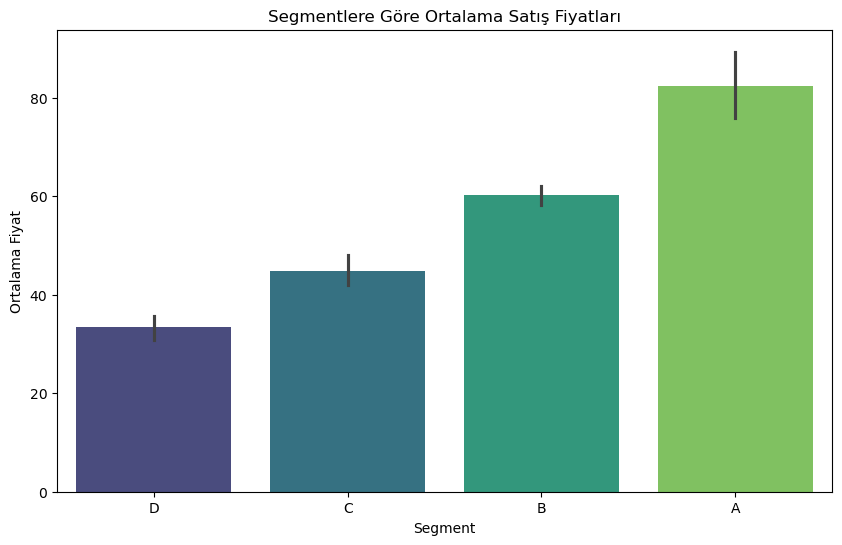

🔍 'ANTALYA_HERŞEY DAHIL_HIGH' satış seviyesi için tahmini segment ve fiyat bilgisi:


,sales_level_based,SEGMENT,Ortalama_Fiyat
9,ANTALYA_HERŞEY DAHIL_HIGH,B,64.92



🚀 Gezinomi satış verisi analizi başarıyla tamamlandı! Yeni müşteriler için ortalama kazanç tahminleri hazır. 👏


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

print("🎉 Proje Tamamlandı! 🎉\n")
print(f"Toplam Satış Seviyesi Sayısı: {agg_df['sales_level_based'].nunique()}")
print(f"Toplam Segment Sayısı: {agg_df['SEGMENT'].nunique()}\n")

# Segmentlere göre Ortalama Fiyat Grafiği
plt.figure(figsize=(10,6))
sns.barplot(data=agg_df, x="SEGMENT", y="Ortalama_Fiyat", order=["D", "C", "B", "A"], palette="viridis")
plt.title("Segmentlere Göre Ortalama Satış Fiyatları")
plt.xlabel("Segment")
plt.ylabel("Ortalama Fiyat")
plt.show()

new_user = "ANTALYA_HERŞEY DAHIL_HIGH"
user_info = agg_df[agg_df["sales_level_based"] == new_user][["sales_level_based", "SEGMENT", "Ortalama_Fiyat"]]

print(f"🔍 '{new_user}' satış seviyesi için tahmini segment ve fiyat bilgisi:")
display(user_info)

print("\n🚀 Gezinomi satış verisi analizi başarıyla tamamlandı! Yeni müşteriler için ortalama kazanç tahminleri hazır. 👏")
